In [74]:
! pip install langchain langgraph

In [75]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph ,START,END  #framework that helps you design and manage the flow of tasks in your application

In [76]:
class AgentState(TypedDict):
    number1:int
    number2:int
    operation1:str
    number3:int
    number4:int
    operation2:str
    final_answer:str

In [77]:
def adder_node_1(state:AgentState)->AgentState:
    state['final_answer'] = state['number1'] + state['number2']
    return state

def adder_node_2(state:AgentState)->AgentState:
    state['final_answer'] = state['final_answer']+(state['number3'] + state['number4'])
    return state


def subtractor_node_1(state:AgentState)->AgentState:
    state['final_answer'] = state['number1'] - state['number2']
    return state

def subtractor_node_2(state:AgentState)->AgentState:
    state['final_answer'] = state['final_answer']+(state['number3'] - state['number4'])
    return state

def select_operation_1(state:AgentState)->AgentState:
    return 'addition' if state['operation1'] == '+' else 'subtraction'
    


def select_operation_2(state:AgentState)->AgentState:
    return 'addition' if state['operation2'] == '+' else 'subtraction'

In [78]:
graph = StateGraph(AgentState)


graph.add_node('adder_node_1',adder_node_1)
graph.add_node('adder_node_2',adder_node_2)
graph.add_node('subtractor_node_1',subtractor_node_1)
graph.add_node('subtractor_node_2',subtractor_node_2)


#adding the router nodes

graph.add_node('router1',lambda state:state)
graph.add_node('router2',lambda state:state)


#adding the edges

graph.add_edge(START,'router1')

#adding conditional edges
graph.add_conditional_edges(
    'router1',
    select_operation_1,
    {
        'addition':'adder_node_1',
        'subtraction':'subtractor_node_1'
    }   
)

#connecting to router2

graph.add_edge('adder_node_1','router2')
graph.add_edge('subtractor_node_1','router2')

graph.add_conditional_edges(
    'router2',
    select_operation_2,
    {
        'addition': 'adder_node_2',
        'subtraction':'subtractor_node_2'
    }
)

# connetcting the ending points
graph.add_edge('adder_node_2',END)
graph.add_edge('subtractor_node_2',END)

app = graph.compile()

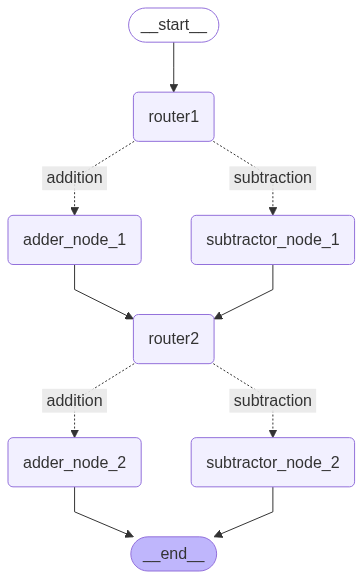

In [79]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [80]:
inital_state = AgentState(number1=10,
    number2=20,
    operation1='+',
    number3=30,
    number4 =40,
    operation2='-'
    )

app.invoke(inital_state)

{'number1': 10,
 'number2': 20,
 'operation1': '+',
 'number3': 30,
 'number4': 40,
 'operation2': '-',
 'final_answer': 20}

In [81]:
app.invoke({
    'number1':10,
    'number2':20,
    'operation1':'+',
    'number3':30,
    'number4':40,
    'operation2':'-'
    })

{'number1': 10,
 'number2': 20,
 'operation1': '+',
 'number3': 30,
 'number4': 40,
 'operation2': '-',
 'final_answer': 20}